##Penyiapan Data

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"laponfahil","key":"050887acf8a635d06840e071c8d8c7ab"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

100% 219M/219M [00:06<00:00, 43.3MB/s]
100% 219M/219M [00:06<00:00, 38.3MB/s]


In [10]:
# melakukan ekstraksi pada file zip
import zipfile
local_zip = 'rice-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/rice-image-dataset/')
zip_ref.close()

In [11]:
import os
import shutil
base_dir = '/content/rice-image-dataset/Rice_Image_Dataset/'
os.remove(os.path.join(base_dir, 'Rice_Citation_Request.txt'))


##Data Understending

In [12]:
print(os.listdir(base_dir))

['Jasmine', 'Basmati', 'Ipsala', 'Arborio', 'Karacadag']


In [14]:
import glob
data = ['Jasmine', 'Basmati', 'Ipsala', 'Arborio', 'Karacadag']

for data in data:
    print(f'{data} images: ', len(os.listdir(f'/content/rice-image-dataset/Rice_Image_Dataset/{data}')))

    total_image = len(list(glob.iglob("/content/rice-image-dataset/Rice_Image_Dataset/*/*.*", recursive=True)))
print("Total Data Image JPEG     : ",total_image)

Jasmine images:  15000
Basmati images:  15000
Ipsala images:  15000
Arborio images:  15000
Karacadag images:  15000
Total Data Image JPEG     :  75000


In [18]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 75000


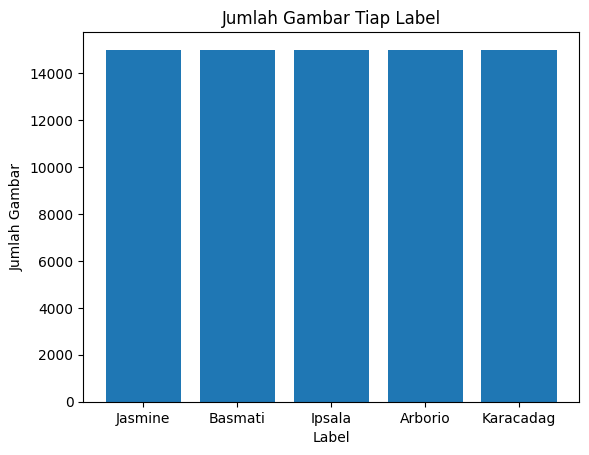

In [19]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

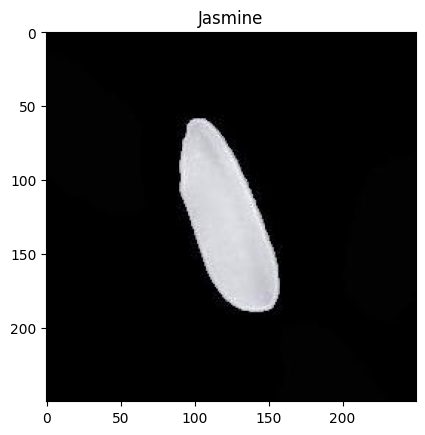

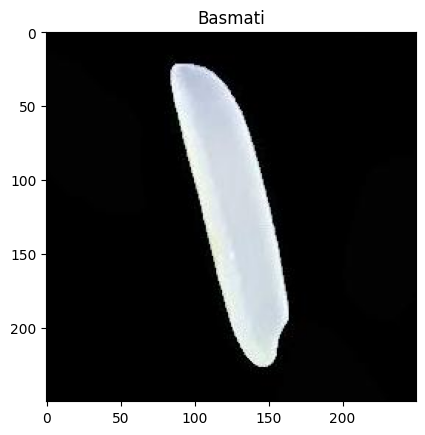

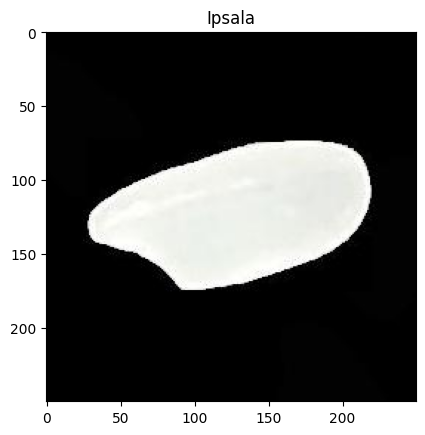

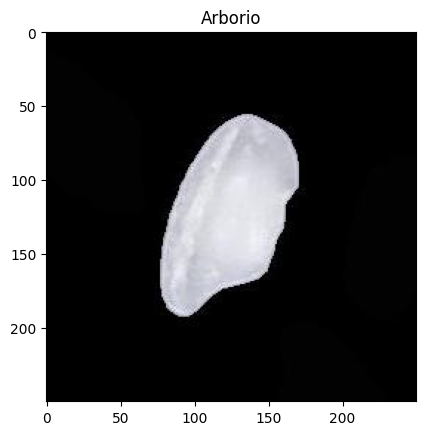

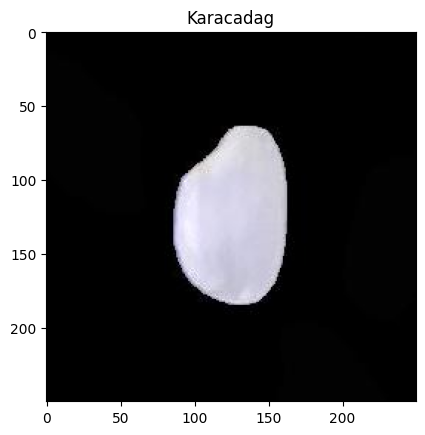

In [20]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

##**Data Preparation**

In [21]:
IMAGE_SIZE = (200,200)
BATCH_SIZE = 32
SEED = 666

In [22]:
# Menggunakan ImageDataGenerator untuk preprocessing
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2
)

In [23]:
# Menyiapkan data train dan data validation
train_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='training',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

valid_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='validation',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [24]:
# Image Augmentation
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(IMAGE_SIZE[0],
                                  IMAGE_SIZE[1],
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Rescaling(1./255)
  ]
)

##**Modelling**

##CNN

In [25]:
# Membuat arsitektur model CNN
cnn_model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [31]:
# Training model CNN
cnn_hist = cnn_model.fit(
    train_data,
    steps_per_epoch = 10,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
10/10 [==============================] - 471s 52s/step - loss: 0.2007 - accuracy: 0.9125 - val_loss: 0.1331 - val_accuracy: 0.9528
Epoch 2/10
10/10 [==============================] - 471s 52s/step - loss: 0.2003 - accuracy: 0.9312 - val_loss: 0.1096 - val_accuracy: 0.9643
Epoch 3/10
10/10 [==============================] - 425s 47s/step - loss: 0.2808 - accuracy: 0.9031 - val_loss: 0.1398 - val_accuracy: 0.9508
Epoch 4/10
10/10 [==============================] - 471s 52s/step - loss: 0.1968 - accuracy: 0.9281 - val_loss: 0.1152 - val_accuracy: 0.9596
Epoch 5/10
10/10 [==============================] - 471s 52s/step - loss: 0.1793 - accuracy: 0.9531 - val_loss: 0.1397 - val_accuracy: 0.9507
Epoch 6/10
10/10 [==============================] - 418s 46s/step - loss: 0.1723 - accuracy: 0.9344 - val_loss: 0.2152 - val_accuracy: 0.9310
Epoch 7/10
10/10 [==============================] - 411s 45s/step - loss: 0.2071 - accuracy: 0.9312 - val_loss: 0.2077 - val_accuracy: 0.9241
Epoch 

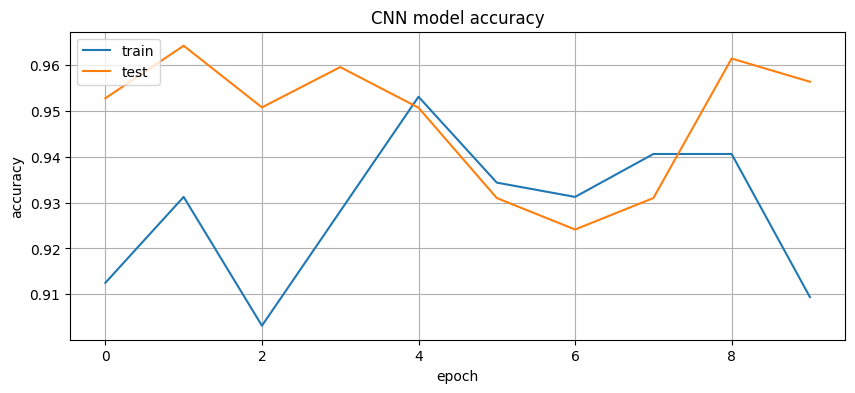

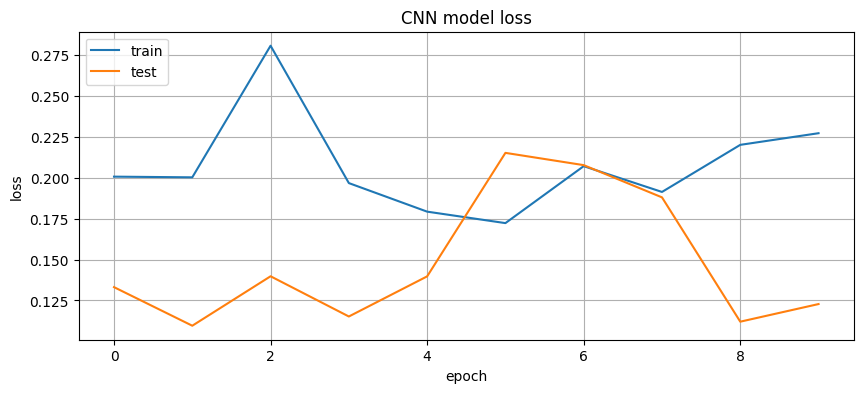

In [35]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

##Uji Coba Model

In [36]:
# Menampilkan daftar kelas atau label gambar
train_data.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

Saving Jasmine (10014).jpg to Jasmine (10014).jpg
1/1 [==============================] - 0s 65ms/step
Jasmine (10014).jpg
Jasmine


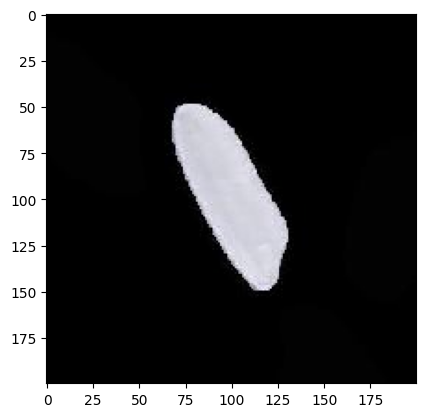

In [45]:
# Menguji coba model
import numpy as np
from keras.preprocessing import image
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = cnn_model.predict(images, batch_size=BATCH_SIZE)
  classes = np.argmax(classes)

  print(fn)
  if classes==0:
    print('Arborio')
  elif classes==1:
    print('Basmati')
  elif classes==2:
    print('Ipsala')
  elif classes==3:
    print('Jasmine')
  else:
    print('Karacadag')

##Deployment
Agar nantinya dapat diimplementasikan atau dikembangkan lebih lanjut, model perlu di-deploy terlebih dahulu dalam format HDF5, TFLite (Mobile) atau TensorflowJS (Web)

In [49]:
#HDF5
cnn_model.save('model-Rice_Image_Dataset.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
#TFLITE
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('model-Rice_Image_Dataset.tflite', 'wb') as f:
  f.write(tflite_model)

In [52]:
#Tensor Flow
# Instal TensorflowJS
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 50.9 MB/s eta 0:00:00


In [53]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model-Rice_Image_Dataset.h5 /content/modeltfjs

2023-12-15 15:15:13.398765: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 15:15:13.398848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 15:15:13.401753: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 15:15:15.477126: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
